# Model Evaluation

An example of using cross-validation on linear regression models. 

### Data Import

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



df = pd.read_csv('housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


### Cross-validation setup

Use the scikit-learn Linear Regression model as the basis for the cross-validation.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

### Plotting the Residuals

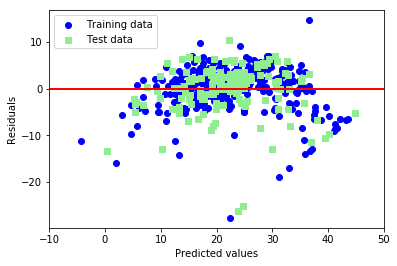

In [3]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')

plt.scatter(y_test_pred,  y_test_pred - y_test,c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

### Evaluate Model Performance using Mean-Squared Error (MSE)

A standard way of evaluating the error of an estimate:

$MSE = \frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-\widehat{y}^{(i)})^{2}$



In [4]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


### Evaluating Residuals

The __redisuals__ can also be characterized in terms of the __MSE__ by:

$R^{2} = 1 - \frac{MSE}{Var(y)} = 1 - \frac{SSE}{SST} = 1 - \frac{\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-\widehat{y}^{(i)})^{2}}{\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-\mu_{y})^{2}}$

In [5]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673
